In [36]:
#distance b/w to points
import numpy as np
def distance(p1,p2):
    """Find the distance b'w points p1 and p2"""
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1,p2)

4.242640687119285

In [37]:
help(distance)

Help on function distance in module __main__:

distance(p1, p2)
    Find the distance b'w points p1 and p2



In [38]:
#MAJORITY VOTE
import random
def majority_vote(votes):
    vote_counts = {}

    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
    winners = []
    max_counts = max(vote_counts.values())
    for vote,count in vote_counts.items():
        if count == max_counts:
            winners.append(vote)

    return random.choice(winners)

votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2,1,1,1]
winner = majority_vote(votes)
winner

2

In [39]:
import scipy.stats as ss
def majority_vote_short(votes):
    """return most common element in votes using mode"""
    mode , count = ss.mstats.mode(votes)

    return random.choice(mode),count
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2,1,1,1]
winner,count = majority_vote_short(votes)
print("Winner:", winner)
print("Count:", count)

Winner: 1.0
Count: [6.]


In [40]:
help(ss.mstats.mode)
#You are correct; both 2 and 3 also occur 6 times in your votes list.
#The issue with the code is that it uses ss.mstats.mode, which returns the first mode encountered in the data.


Help on function mode in module scipy.stats._mstats_basic:

mode(a, axis=0)
    Returns an array of the modal (most common) value in the passed array.
    
    Parameters
    ----------
    a : array_like
        n-dimensional array of which to find mode(s).
    axis : int or None, optional
        Axis along which to operate. Default is 0. If None, compute over
        the whole array `a`.
    
    Returns
    -------
    mode : ndarray
        Array of modal values.
    count : ndarray
        Array of counts for each mode.
    
    Notes
    -----
    For more details, see `scipy.stats.mode`.
    
    Examples
    --------
    >>> import numpy as np
    >>> from scipy import stats
    >>> from scipy.stats import mstats
    >>> m_arr = np.ma.array([1, 1, 0, 0, 0, 0], mask=[0, 0, 1, 1, 1, 0])
    >>> mstats.mode(m_arr)  # note that most zeros are masked
    ModeResult(mode=array([1.]), count=array([2.]))



array([1, 1, 1, 2, 2, 2, 3, 3, 3])

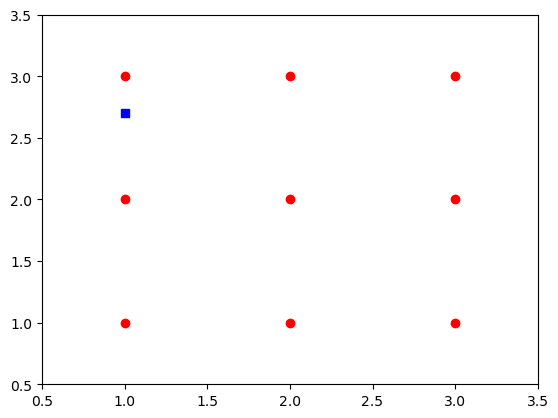

In [68]:
#finding k nearest points from p
import matplotlib.pyplot as plt
points = np.array([[1,1], [1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
#np array expects as input just 1 list
p = np.array([1,2.7])

plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bs")

plt.axis([0.5,3.5,0.5,3.5])
points[:,0]

In [72]:
  
def find_nearest_neighbours(p,points,k = 5):
    """find the k nearest neighbours of point p and return their indices"""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p,points[i])
    ind = np.argsort(distances)
    return ind[:k]

points = np.array([[1,1], [1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
#np array expects as input just 1 list
p = np.array([1,2.7])


ind = find_nearest_neighbours(p,points,5)
ind

array([2, 1, 5, 4, 0], dtype=int64)

In [73]:
def knn_predict(p,points,outcomes,k=5):
    ind = find_nearest_neighbours(p,points,k)
    return majority_vote(outcomes[ind])
outcomes = np.array([0,0,0,0,1,1,1,1,1]) 
knn_predict(np.array([1,2.7]), points,outcomes,k=5)

0

In [74]:
outcomes[ind]

array([0, 0, 1, 1, 0])

In [70]:
ss.norm(0,1).rvs((5,2))


array([[-1.48090775,  0.40695446],
       [ 0.25239137,  2.31351329],
       [-0.74955073,  0.4788028 ],
       [ 0.37387803,  0.55509343],
       [ 0.07073795,  1.24073604]])

In [71]:
ss.norm(1,1).rvs((5,2))

array([[ 0.22045184,  0.16867036],
       [ 1.66552652,  0.4816039 ],
       [-0.30077188,  1.34621727],
       [-0.06952218,  0.76332089],
       [ 1.13658341,  0.82470453]])

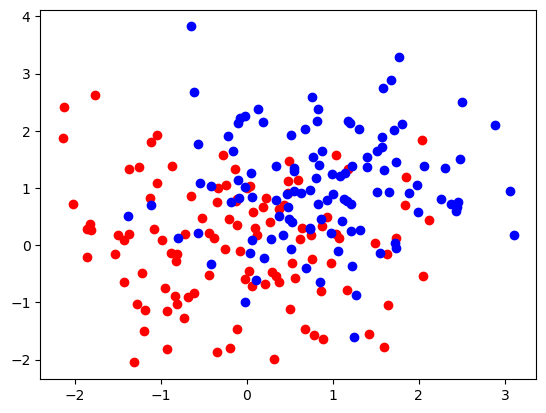

In [103]:
def generate_synthetic_data(n = 50):
    """create 2 sets of points from bivariate normal distributions"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))),axis = 0)
    #axis = 0 is row wise 
    #axis = 1 is columns wise
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

n = 110
(points,outcomes) = generate_synthetic_data(n)
plt.figure()
plt.plot(points[:n,0],points[:n,1], "ro")
plt.plot(points[n:,0],points[n:,1], "bo");

In [79]:
len(points[:,1])

220

In [104]:
def make_prediction_grid(predictors, outcomes, limits,h,k):
    """classify each point on the prediction grid"""
    (x_min,x_max, y_min, y_max) = limits
    xs = np.arange(x_min,x_max,h)
    ys = np.arange(y_min,y_max,h)
    xx,yy = np.meshgrid(xs,ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p,predictors,outcomes,k)
    return (xx,yy, prediction_grid)

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

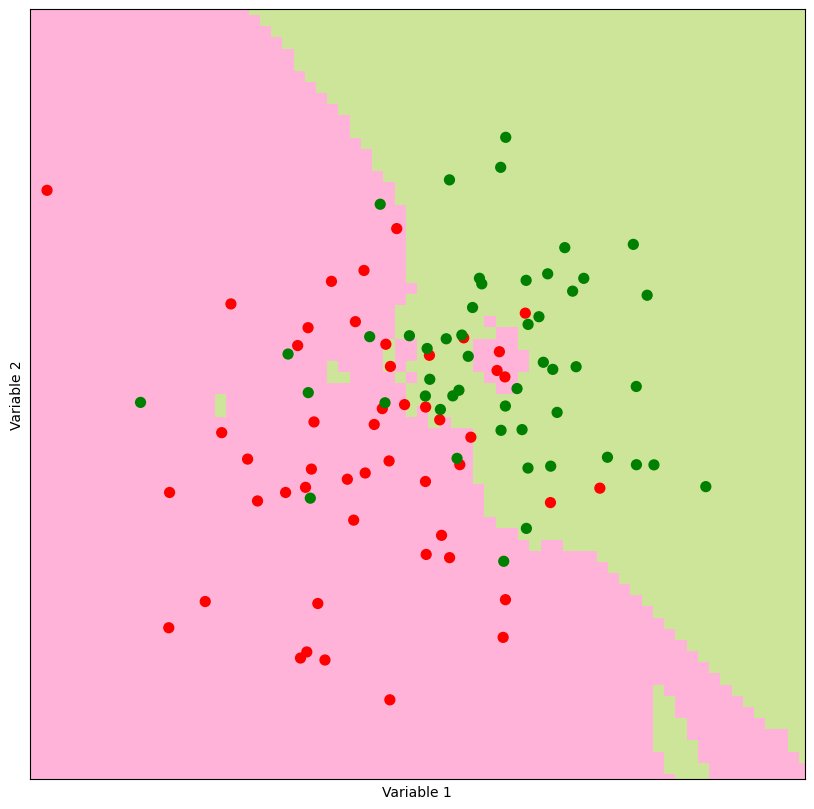

In [105]:
(predictors,outcomes) = generate_synthetic_data()

k=5; filename="knn_synth_5.pdf"; limits = (-3,4,-3,4); h = 0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

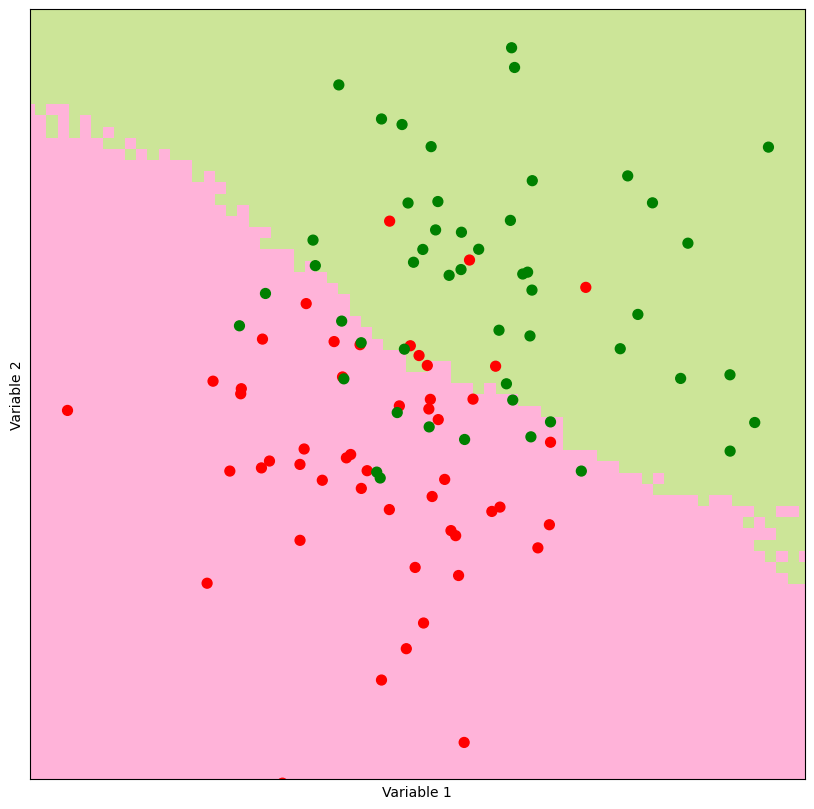

In [22]:
k=50; filename="knn_synth_6.pdf"; limits = (-3,4,-3,4); h = 0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

It turns out that using a value for k that's too large or too small
is not optimal.
A phenomenon that is known as the bias-variance tradeoff.
This suggests that some intermediate values of k might be best.